In [15]:
#Colten Hoffmeier
#This takes a txt file and reads the count values on pixels in a ccd. Then it plots that spectrum and fits
#A 1d gaussian.
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

data = '../Obsv_Astro/dark_FLMS137991_00001.txt'
data = np.loadtxt(data)
x = np.linspace(1,2048, 2048)
y_vals = np.array([])

In [17]:
#grabbing y values from txt file and initializing the gaussian for plotting.
for i in range(len(data)):
    y_vals = np.append(y_vals, data[i,1])
gaussian = sp.ndimage.gaussian_filter1d(y_vals, 8)

Text(0.5, 1.0, 'Neon Spectrum in Counts on Pixels')

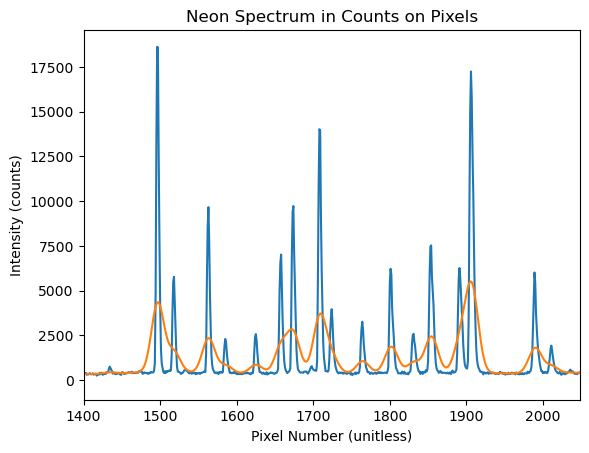

In [69]:
#plotting x as pixel number, and y as counts. Also applying gaussian to the line. fitline
#didn't work well and also didn't give much information.
plt.plot(x, y_vals)
#window is used for neon specifically, can be commented out to see the whole graph.
plt.xlim(1400,2048)
plt.plot(x, gaussian)
plt.xlabel('Pixel Number (unitless)')
plt.ylabel('Intensity (counts)')
plt.title('Neon Spectrum in Counts on Pixels')
#plt.savefig('../Obsv_Astro/NeonSpectrum.png')

In [71]:
#These next cells were just me trying to see if this would work and give a wavelength
#I mention in the report that I would need to normalize this to try and get a real wavelength.

def fitline(x,a,b,c):
    return (a*x**2) + b*x + c
popt, pcov = sp.optimize.curve_fit(fitline, 1497, y_vals)

In [81]:
testwavelength = (fitline(1497, *popt))
testwavelength

651.3063025325537